In [12]:
import pandas as pd
from gensim.models import Word2Vec
from konlpy.tag import *
from matplotlib import pyplot as plt
from tqdm import tqdm
from pyprnt import prnt

from utils import STOP_WORDS

# News Categoriser using Machine Learning
## Goal: Predict the category using machine learning models (not deep learning).

Following the below map,

![](ml_map.png)

We have more than 50 samples, predicting a category and have a labeled data.
With less than 100K samples and it's text data.
So, `(Multinomial) Naive Bayes` first.

Set random state as a `23` and study about `kfold`, `auroc`, `auprc` and `acc`.

## Sub-Goals
* Use label encoding
* Predict the category using the input strings.
* Keyword extraction
* Use many different prediction models
* Use `word2vec` over `TF-IDF`

## 1. Text Pre-processing

In [2]:
train = pd.read_csv('./datasets/ex_train.csv')
test = pd.read_csv('./datasets/ex_test.csv')
valid = pd.read_csv('./datasets/ex_validation.csv')

In [3]:
train.sample()

,date,category,press,title,document,link,summary
16339,2022-07-06 15:15:13,economy,연합뉴스,게시판 우리은행 개방형 제휴제안 채널 WON 파트너십 오픈,우리은행 제공. 재판매 및 DB금지 우리은행은 기업이 자유롭게 제휴를 제안할 수 있...,https://n.news.naver.com/mnews/article/001/001...,우리은행은 6일 기업이 홈페이지의 제휴 제안 메뉴에서 상품 서비스 마케팅 비금융 서...


In [4]:
train[['title', 'document', 'summary']].isna().sum()

title       0
document    0
summary     0
dtype: int64

In [10]:
okt = Okt()

tokenized_data = []
prnt(train.document)
ready = tqdm(train.document)
prnt(ready)
for sentence in ready:
    tokenized_sentence = okt.morphs(sentence, stem=True)  # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in STOP_WORDS]  # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

0        앵커 정부가 올해 하반기 우리 경제의 버팀목인 수출 확대를 위해 총력을 기울이기로 ...
1        문어 랍스터 대게 갑오징어 새우 소라 등 해산물 활용 미국식 해물찜 시푸드 보일 준...
2        한탄바이러스 발견 노벨상 유력 후보로 자주 거론 한국을 대표하는 의학자이자 미생물학...
3        기사내용 요약 우주발사체 사업 본격화 서울 뉴시스 김경택 기자 에디슨이노가 우주발사...
4        SK바이오사이언스가 글로벌 사업의 고도화를 위해 조직 개편을 단행했다. SK바이오사...
                               ...                        
22189    보고서 발간 등 지속가능경영 힘써 대우조선해양 통합보고서. 사진제공 대우조선해양 서...
22190    이데일리 김소연 기자 신원종합개발 017000 은 단기 차입금 합계가 198억800...
22191    경제 뉴스와 꼭 알아야 할 소식들을 픽 해서 전해드리는 박태원의 픽 첫 번째 키워드...
22192    세종시에 위치한 과기정통부 청사. 사진 과기정통부 국내 SaaS 서비스형 소프트웨어...
22193    사진 현대차 아이오닉 5 디지털데일리 변재영 기자 현대자동차가 올해 6월 국내 5만...
Name: document, Length: 22194, dtype: object


  0%|          | 0/22194 [00:00<?, ?it/s]

  0%|          | 0/22194 [00:00<?, ?it/s]


100%|██████████| 22194/22194 [09:27<00:00, 39.10it/s]


리뷰의 최대 길이 : 4015
리뷰의 평균 길이 : 287.8196359376408


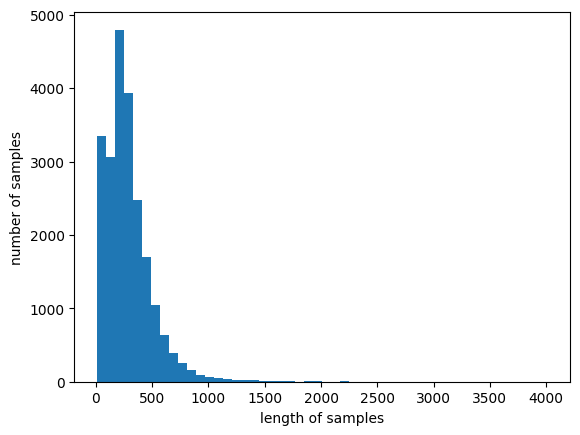

In [11]:
# 리뷰 길이 분포 확인
print('기사의 최대 길이 :', max(len(review) for review in tokenized_data))
print('기사의 평균 길이 :', sum(map(len, tokenized_data)) / len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [13]:
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [14]:
model.wv.vectors.shape

(33423, 100)

In [16]:
model.wv.most_similar("김건희")

[('여사', 0.9140968322753906),
 ('번복', 0.7493395805358887),
 ('합참의장', 0.7272157073020935),
 ('파문', 0.7178741693496704),
 ('CCO', 0.7096223831176758),
 ('지피다', 0.7079779505729675),
 ('재송부', 0.7049895524978638),
 ('묘연하다', 0.7046442031860352),
 ('유료도로', 0.7022061347961426),
 ('장제원', 0.6990014910697937)]

In [22]:
model.wv.most_similar("청와대")

[('대통령실', 0.6831483244895935),
 ('국회의원', 0.6546517610549927),
 ('이재명', 0.6400635242462158),
 ('인수위', 0.6385417580604553),
 ('시절', 0.6366008520126343),
 ('대도시권', 0.6307417750358582),
 ('권성동', 0.6261577606201172),
 ('최승재', 0.6220310926437378),
 ('이주영', 0.6210716366767883),
 ('친문', 0.619127094745636)]